In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [22]:
data_path = ('/Users/jasonpaik9/Documents/Thinkful/Bootcamp/Unit 2/PAStateCrime.csv')

In [23]:
raw_data = pd.read_csv(data_path)

In [99]:
raw_data.head(20)

,City,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorTheft,Arson
0,"Abington Township, Lackawanna County",1750.0,1.0,0.0,0.0,0.0,1.0,14.0,4.0,10.0,0.0,0.0
1,"Abington Township, Montgomery County",55559.0,63.0,0.0,5.0,28.0,30.0,1146.0,169.0,952.0,25.0,4.0
2,Adamstown,1845.0,0.0,0.0,0.0,0.0,0.0,20.0,4.0,12.0,4.0,0.0
3,"Adams Township, Butler County",12582.0,8.0,0.0,0.0,0.0,8.0,63.0,11.0,51.0,1.0,0.0
4,"Adams Township, Cambria County",5868.0,0.0,0.0,0.0,0.0,0.0,25.0,9.0,16.0,0.0,0.0
5,Akron,3918.0,6.0,0.0,0.0,0.0,6.0,28.0,9.0,18.0,1.0,1.0
6,Alburtis,2390.0,1.0,0.0,0.0,1.0,0.0,15.0,0.0,15.0,0.0,0.0
7,Aldan,4150.0,2.0,0.0,1.0,1.0,0.0,87.0,4.0,82.0,1.0,0.0
8,Aleppo Township,1918.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0
9,Aliquippa,9323.0,49.0,1.0,1.0,8.0,39.0,136.0,43.0,83.0,10.0,0.0


In [28]:
#Remove the bad column
raw_data = raw_data.drop('Unnamed: 12',1)

In [36]:
raw_data.dtypes

City                  object
Population           float64
ViolentCrime         float64
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime        float64
Burglary             float64
Theft                float64
MotorTheft           float64
Arson                float64
dtype: object

In [33]:
#Clean data to remove commas
raw_data['Population'] = raw_data['Population'].str.replace(',', '')
raw_data['ViolentCrime'] = raw_data['ViolentCrime'].str.replace(',', '')
#raw_data['Murder'] = raw_data['Murder'].str.replace(',', '')
raw_data['Rape'] = raw_data['Rape'].str.replace(',', '')
raw_data['Robbery'] = raw_data['Robbery'].str.replace(',', '')
raw_data['AggravatedAssault'] = raw_data['AggravatedAssault'].str.replace(',', '')
raw_data['PropertyCrime'] = raw_data['PropertyCrime'].str.replace(',', '')
raw_data['Burglary'] = raw_data['Burglary'].str.replace(',', '')
raw_data['Theft'] = raw_data['Theft'].str.replace(',', '')
raw_data['MotorTheft'] = raw_data['MotorTheft'].str.replace(',', '')
#raw_data['Arson'] = raw_data['Arson'].str.replace(',', '')

In [35]:
#Clean data to convert to float
raw_data['Population'] = raw_data['Population'].astype(float)
raw_data['ViolentCrime'] = raw_data['ViolentCrime'].astype(float)
raw_data['Rape'] = raw_data['Rape'].astype(float)
raw_data['Robbery'] = raw_data['Robbery'].astype(float)
raw_data['AggravatedAssault'] = raw_data['AggravatedAssault'].astype(float)
raw_data['PropertyCrime'] = raw_data['PropertyCrime'].astype(float)
raw_data['Burglary'] = raw_data['Burglary'].astype(float)
raw_data['Theft'] = raw_data['Theft'].astype(float)
raw_data['MotorTheft'] = raw_data['MotorTheft'].astype(float)

In [83]:
model_data = raw_data.filter(['City','Population','Theft','Burglary','PropertyCrime'], axis=1)

In [84]:
model_data.head()

,City,Population,Theft,Burglary,PropertyCrime
0,"Abington Township, Lackawanna County",1750.0,10.0,4.0,14.0
1,"Abington Township, Montgomery County",55559.0,952.0,169.0,1146.0
2,Adamstown,1845.0,12.0,4.0,20.0
3,"Adams Township, Butler County",12582.0,51.0,11.0,63.0
4,"Adams Township, Cambria County",5868.0,16.0,9.0,25.0


In [87]:
model_data['Population'].max()

119277.0

In [93]:
#Remove the NaN in the data
model_data = model_data.fillna(0)

In [86]:
model_data['Population']=model_data['Population'][np.abs(model_data['Population']-model_data['Population'].mean()) <= (3*model_data['Population'].std())]

In [90]:
# Remove outliers greater than 1500
model_data['PropertyCrime'] = model_data['PropertyCrime'][model_data['PropertyCrime'] < 1500]
# Remove outliers greater than 50000
model_data['Population'] = model_data['Population'][model_data['Population'] < 50000]

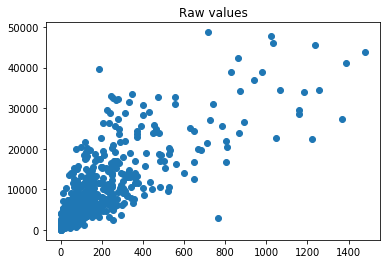

In [91]:
plt.scatter(model_data['PropertyCrime'], model_data['Population'])
plt.title('Raw values')
plt.show()

In [94]:
regr = linear_model.LinearRegression()
Y = model_data['PropertyCrime']
X = model_data[['Population','Theft','Burglary']]
regr.fit(X, Y)
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 0.01915361  0.12529643 -0.40939866]

Intercept: 
 -3.1422554416307378

R-squared:
0.5378462288924882


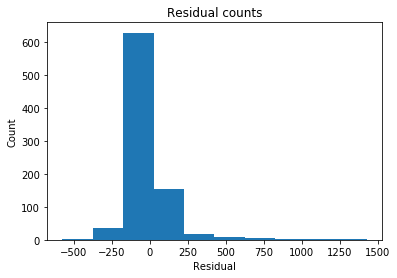

In [95]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = model_data['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

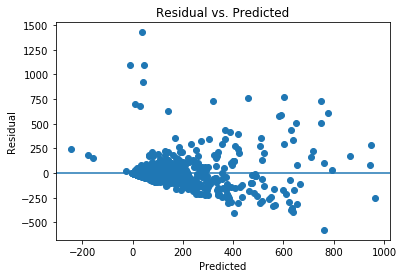

In [96]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [52]:
#Correlation matrix with Murder as one of the columns
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Murder,Robbery
Population,1.000000,0.004548,-0.015555
Murder,0.004548,1.000000,0.994242
Robbery,-0.015555,0.994242,1.000000


In [64]:
#This is the model with Murder, Robbery, Population that attest to PropertyCrime
from sklearn.model_selection import cross_val_score
cross_val_score(regr,X,Y, cv=10)

array([  0.12767648,   0.75050031,   0.6579569 ,   0.67612114,
         0.55262982,   0.55037371, -33.76200637,   0.58164796,
         0.51047309,   0.55972498])

In [81]:
#Correlation matrix with Theft as the column
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Theft,Robbery
Population,1.000000,0.047293,-0.015555
Theft,0.047293,1.000000,0.989295
Robbery,-0.015555,0.989295,1.000000


In [82]:
#This is the model with Theft, Robbery, Population that attest to PropertyCrime
from sklearn.model_selection import cross_val_score
cross_val_score(regr,X,Y, cv=10)

array([  0.34327207,   0.61567792,   0.70982627,   0.74582708,
         0.67088364,   0.65284185, -11.05365516,   0.67501014,
         0.75349976,   0.67295457])

In [97]:
#Correlation matrix with Burglary and Theft as one of the columns
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Theft,Burglary
Population,1.000000,0.047293,0.025240
Theft,0.047293,1.000000,0.991495
Burglary,0.025240,0.991495,1.000000


In [98]:
#This is the model with Theft, Burglary, Population that attest to PropertyCrime
from sklearn.model_selection import cross_val_score
cross_val_score(regr,X,Y, cv=10)

array([  0.16660178,   0.69575055,   0.68703213,   0.6182023 ,
         0.54164065,   0.55640288, -41.48287247,   0.60593736,
         0.56756917,   0.55302367])

Compared to the previous model for the New York state, there was difficulty and inconsistencies to that specifiction where the model was not all too strong. Changing murder and robbery variables to binary/categorical variables created some changes within the model's variance that made it difficult to predict Property Crime.

To revise this a bit, I tested through some changes by first leaving out the binary/categorical variables and using the rates itself. This eliminated small outlier variables of small murder rates within cities shouldn't be categorically equivalent to cities that might have higher murder rates - they should just be compared to how they are. After I just tested variables that I thought would be correlate to Property Crime by swapping variables. Using Population, Theft, and Robbery, I ended up getting the most consistent of results (as shown above) with a cross validation scores near 65-70%. This tells me that instead of murder, using Theft better tweaked my model better than anything else. Testing through different variable bits better helped adjusted my model.